Importing the necessary packages


In [102]:
#import packages
!pip install praw
import requests
import pandas as pd
import praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Reading in the CSV file

In [103]:
#read in the CSV file of Reddit post comments data 
comments_data_df = pd.read_csv('comments.csv')

#display the first 5 rows of the dataframe
comments_data_df.head()

,comment_body,comment_score,comment_ID,comment_created,date_time,date
0,“And these children that you spit on\n\nAs the...,7957,j79gb08,1.675564e+09,2023-02-05 02:29:29,2023-02-05
1,This makes me so happy. When I was in high sch...,2564,j7a305l,1.675577e+09,2023-02-05 06:07:09,2023-02-05
2,Thats so different from when i was in school. ...,1164,j7a2xbl,1.675577e+09,2023-02-05 06:06:13,2023-02-05
3,The kids are alright,3041,j79io4l,1.675565e+09,2023-02-05 02:49:29,2023-02-05
4,“Push me and I’ll push back\n\nI’m done asking...,251,j7aji2k,1.675590e+09,2023-02-05 09:46:19,2023-02-05


1. Carry out the necessary pre-processing of the data (cleaning process); make sure that the column for the regular time is intact. 

Dropping rows with NA

In [104]:
#dropping rows with missing values using .dropna Pandas function; 
#inplace=True parameter makes sure that rows are being dropped from the same dataframe, not creating a new one 
comments_data_df.dropna(inplace=True)
comments_data_df

,comment_body,comment_score,comment_ID,comment_created,date_time,date
0,“And these children that you spit on\n\nAs the...,7957,j79gb08,1.675564e+09,2023-02-05 02:29:29,2023-02-05
1,This makes me so happy. When I was in high sch...,2564,j7a305l,1.675577e+09,2023-02-05 06:07:09,2023-02-05
2,Thats so different from when i was in school. ...,1164,j7a2xbl,1.675577e+09,2023-02-05 06:06:13,2023-02-05
3,The kids are alright,3041,j79io4l,1.675565e+09,2023-02-05 02:49:29,2023-02-05
4,“Push me and I’ll push back\n\nI’m done asking...,251,j7aji2k,1.675590e+09,2023-02-05 09:46:19,2023-02-05
...,...,...,...,...,...,...
2148,"So wouldn't a more appropriate response be ""cl...",1,j7b7wv9,1.675608e+09,2023-02-05 14:33:09,2023-02-05
2149,"No, it’s through grade 3 which is mostly fine ...",1,j7bhdpd,1.675612e+09,2023-02-05 15:45:17,2023-02-05
2150,I pretended it wasn't there? I actually acknow...,1,j7c0psy,1.675620e+09,2023-02-05 17:57:25,2023-02-05
2151,No one is saying it’s in the bill. Literally n...,2,j7c28r1,1.675620e+09,2023-02-05 18:07:28,2023-02-05


Dropping unnecessary columns

In [105]:
#view the current columns in the dataframe 
comments_data_df.columns

#drop unnecessary columns so that only comment body, comment ID, comment score, and date created remain and save it as a new cleaned dataframe
cleaned_comments_data_df = comments_data_df.drop(['comment_created', 'date_time'], axis=1)

#view the columns in the new cleaned dataframe 
cleaned_comments_data_df.columns

Index(['comment_body', 'comment_score', 'comment_ID', 'date'], dtype='object')

Removing unnecessary symbols and stopwords

In [106]:
import re #importing the regular expression module 

import nltk #importing the Natural Language Toolkit module 
nltk.download('stopwords') #downloading nltk stopwords corpus 
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english')) #creating a set of stopwords using english stopwords list kin nltk

#Reddit text cleaning 
def reddit_clean (redd): #defining a function that cleans the comment bodies using regular expressions and stopwords 
    redd = str(redd).lower() #converts the input string to lowercase using lower() method 
    redd = re.sub("'", "", redd) #removes apostrophes from the string 
    redd = re.sub("@[A-Za-z0-9_]+","", redd) #removes all @mentions from the string 
    redd = re.sub("#[A-Za-z0-9_]+","", redd) #removes all #hashtages from the string
    redd = re.sub(r"www.\S+", "", redd) #removes all URLs beginning with www from the string 
    redd = re.sub(r"http\S+", "", redd) #removes all URLS beginning with http from the string 
    redd = re.sub('[()!?]', ' ', redd) #replaces all parentheses, exclamation marks, and question marks with a space in the string
    redd = re.sub('\[.*?\]',' ', redd) #removes all square brackets including their contents from the string 
    redd = re.sub("[^a-z0-9]"," ", redd) #replaces characters that are not numbers or letters with a space in the strong 
    redd = re.sub(r"\b\w{1,3}\b"," ", redd) #removes all words <4 characters long from the string 
    redd = redd.split() #splitting redd string into individual words using split() method 
    stopwords = STOPWORDS #list of stopwords is assigned to variable 'stopwords;
    redd = [w for w in redd if not w in stopwords] #filters out any words in redd that appear in the stopwords list 
    redd = " ".join(word for word in redd) #converting filtered list back into a string using join() method 
    return redd #return the resulting string from the function 
cleaned_comments_data_df['comment_body'] = cleaned_comments_data_df['comment_body'].apply(reddit_clean) #applying the function to the comment_body column using the Pandas .apply method
cleaned_comments_data_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment_body,comment_score,comment_ID,date
0,children spit change worlds immune consultatio...,7957,j79gb08,2023-02-05
1,makes happy high school fifteen years kids soc...,2564,j7a305l,2023-02-05
2,thats different school nobody would ever admit...,1164,j7a2xbl,2023-02-05
3,kids alright,3041,j79io4l,2023-02-05
4,push push back done asking demand nation feel ...,251,j7aji2k,2023-02-05


Tokenization

In [107]:
#tokenize the comments
tokenized_comment_body = cleaned_comments_data_df['comment_body'].apply(lambda x: x.split()) #using a lambda function combined with split() method to split each comment body into a list of tokens (x is each comment body). saving the tokenized list as a new dataframe 'tokenized_comment_body'
tokenized_comment_body

0       [children, spit, change, worlds, immune, consu...
1       [makes, happy, high, school, fifteen, years, k...
2       [thats, different, school, nobody, would, ever...
3                                         [kids, alright]
4       [push, push, back, done, asking, demand, natio...
                              ...                        
2148    [wouldnt, appropriate, response, clarify, appr...
2149    [grade, mostly, fine, next, part, pretending, ...
2150    [pretended, wasnt, actually, acknowledged, vag...
2151    [saying, bill, literally, saying, effect, part...
2152    [effect, misinformation, protesters, spreading...
Name: comment_body, Length: 2153, dtype: object

Stemming

In [108]:
from nltk.stem import PorterStemmer #importing PorterStemmer from nltk.stem module 

stemmer = PorterStemmer() #creating an object to store stem words 
tokenized_reddit_post = tokenized_comment_body.apply(lambda x: [stemmer.stem(i) for i in x]) #applying a lambda function to iterate over the list of tokenizd words and apply the stemming function to each word using stemmer.stem(i) method
cleaned_comments_data_df['tokenized']= tokenized_comment_body #creating a new 'tokenized' column in the cleaned comments dataframe containing the stemmed words
cleaned_comments_data_df.head() #view the new tokenized column in the dataframe 

,comment_body,comment_score,comment_ID,date,tokenized
0,children spit change worlds immune consultatio...,7957,j79gb08,2023-02-05,"[children, spit, change, worlds, immune, consu..."
1,makes happy high school fifteen years kids soc...,2564,j7a305l,2023-02-05,"[makes, happy, high, school, fifteen, years, k..."
2,thats different school nobody would ever admit...,1164,j7a2xbl,2023-02-05,"[thats, different, school, nobody, would, ever..."
3,kids alright,3041,j79io4l,2023-02-05,"[kids, alright]"
4,push push back done asking demand nation feel ...,251,j7aji2k,2023-02-05,"[push, push, back, done, asking, demand, natio..."


2. Make a word cloud from the comments

Creating a WordCloud

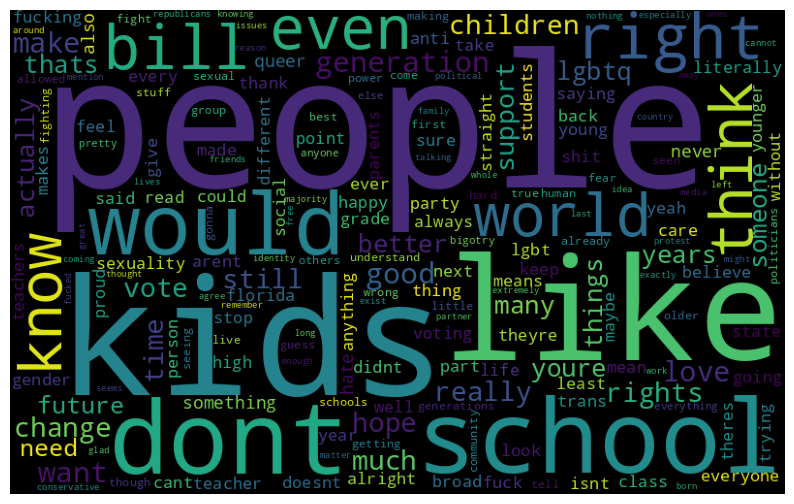

In [109]:
import matplotlib.pyplot as plt #importing the matplotlib.pyplot library
from wordcloud import WordCloud #importing WordCloud from the wordcloud library
import collections #importing collections module 

all_words = ' '.join([text for text in cleaned_comments_data_df['comment_body']]) #concatenating comments comment_body column into a string 'all_words'
count_word = collections.Counter(all_words.split()) #uisng split() method to split 'all_words' into a list of individual words; counting the frequency of each word using collections.Counter function; creating a dictionary of words and their counts

wordcloud = WordCloud(width=800, height=500) #creating a new wordcloud with a specified width and height 
wordcloud.generate_from_frequencies(count_word) #generating a wordcloud from the count_word dictionary; the frequency of each word determines its size in the WordCloud
plt.figure(figsize=(10, 7)) #creating a new plot with specified dimensions of 10 by 7 inches 
plt.imshow(wordcloud) #displaying the WordCloud in the plot using .imshow method 
plt.axis("off") #turning off plot axis display
plt.show() #display resulting plot 

In [110]:
#getting the 15 most common words

import itertools #importing itertools module 
count_word = collections.Counter(all_words.split()) #creating an object 'count_word' using .Counter() method; takes each individual word in all_words using split() method and returns the frequency of each word 
most_common_15 =count_word.most_common(15) #returns a tuples list of the 15 most common words in all_words using most.common() method, sorted in descending order by frequency
most_common_15 

[('people', 508),
 ('kids', 377),
 ('like', 286),
 ('school', 196),
 ('dont', 193),
 ('would', 183),
 ('right', 165),
 ('bill', 159),
 ('even', 150),
 ('world', 150),
 ('think', 149),
 ('know', 149),
 ('generation', 125),
 ('good', 122),
 ('want', 122)]

3. Run your sentiment analysis and report the polarity and subjectivity

Calculating Polarity and Subjectivity

In [111]:
from textblob import TextBlob #importing Texblob module from Texblob libray for sentiment analysis.
cleaned_comments_data_df['polarity'] = cleaned_comments_data_df['comment_body'].apply(lambda z: TextBlob(z).sentiment.polarity) #adding a new 'polarity' column to the dataframe; calculating polarity values by applying the lambda function to each commment in the comment_body column
#lambda function takes the current value of comment_body (z), creates a new TextBlob object with that value, and then retrieves the polarity score performed by TextBlob. 
#polarity score range: -1 to 1, (-1)= very negative sentiment, (1)= very positive sentiment
cleaned_comments_data_df['subjectivity'] = cleaned_comments_data_df['comment_body'].apply(lambda y: TextBlob(y).sentiment.subjectivity) #adding a new 'subjectivity' column to the dataframe
#subjectivity is being calculated with the same methods as polarity, but replacing polarity score with subjectivity score. 
#subjectivity score range: 0 to 1, (0)= very objective statement, (1)= very subjective statement
cleaned_comments_data_df.head() #view first 5 rows of dataframe with two new added columns

,comment_body,comment_score,comment_ID,date,tokenized,polarity,subjectivity
0,children spit change worlds immune consultatio...,7957,j79gb08,2023-02-05,"[children, spit, change, worlds, immune, consu...",0.250000,0.250000
1,makes happy high school fifteen years kids soc...,2564,j7a305l,2023-02-05,"[makes, happy, high, school, fifteen, years, k...",0.368667,0.621333
2,thats different school nobody would ever admit...,1164,j7a2xbl,2023-02-05,"[thats, different, school, nobody, would, ever...",0.035714,0.633333
3,kids alright,3041,j79io4l,2023-02-05,"[kids, alright]",0.000000,0.000000
4,push push back done asking demand nation feel ...,251,j7aji2k,2023-02-05,"[push, push, back, done, asking, demand, natio...",0.100000,0.620000


Classifying Polarity

In [112]:
#create a function to classify the polarity
def analyze_sentiment(text): #defining a new function to analyze sentiment of each comment, 'analyze_sentiment', which takes the argument 'text'. 
    blob = TextBlob(text) #creating a new TextBlob object w/ the text argument passed to the function. I will use the TextBlob object for performing sentiment analysis.
    sentiment_polarity = blob.sentiment.polarity #retrieving the polarity score of the 'blob' object
    sentiment_subjectivity = blob.sentiment.subjectivity #retrieving the subjectivity score of the 'blob' object 
    if sentiment_polarity > 0: #starts an if-statement that will execute if the sentiment score is >0
        return 'Positive Sentiment' #returns the string 'Positive Sentiment' if the sentiment score is >0
    elif sentiment_polarity == 0: #starts an elif statement that will execute the code below if the polarity score is =0
        return 'Neutral Sentiment' #returns the string 'Neutral Sentiment' if the sentiment score is =0
    else: #starts an else satement that will execute the code below if the sentiment score is <0
        return 'Negative Sentiment' #returns the string 'Negative Sentiment' if the sentiment score is <0

In [113]:
#applying the previously defined function to create a new column 
cleaned_comments_data_df['sentiment'] = cleaned_comments_data_df['comment_body'].apply(analyze_sentiment) #adds a new 'sentiment' column to cleaned_comments_data_df; applies analyze_sentiment function to each value in the 'comment_body' column using the .apply() method
cleaned_comments_data_df.head() #view first 5 rows of dataframe with newly added columns

,comment_body,comment_score,comment_ID,date,tokenized,polarity,subjectivity,sentiment
0,children spit change worlds immune consultatio...,7957,j79gb08,2023-02-05,"[children, spit, change, worlds, immune, consu...",0.250000,0.250000,Positive Sentiment
1,makes happy high school fifteen years kids soc...,2564,j7a305l,2023-02-05,"[makes, happy, high, school, fifteen, years, k...",0.368667,0.621333,Positive Sentiment
2,thats different school nobody would ever admit...,1164,j7a2xbl,2023-02-05,"[thats, different, school, nobody, would, ever...",0.035714,0.633333,Positive Sentiment
3,kids alright,3041,j79io4l,2023-02-05,"[kids, alright]",0.000000,0.000000,Neutral Sentiment
4,push push back done asking demand nation feel ...,251,j7aji2k,2023-02-05,"[push, push, back, done, asking, demand, natio...",0.100000,0.620000,Positive Sentiment


Classifying Subjectivity

In [114]:
#create a new subjectivity column
import numpy as np #importing the numpy library
cleaned_comments_data_df['subjectivity2'] = np.where(cleaned_comments_data_df['subjectivity'] > 0.5, 'Subjective', 'Objective') #creating a new column 'subjectivity 2'. the conditional statement checks for values >0.5. If greater, the corresponding value will be labeled 'subjective; if less than, the corresponding value will be labeled 'objective'
cleaned_comments_data_df.head() #view first 5 rows of dataframe with newly added columns

,comment_body,comment_score,comment_ID,date,tokenized,polarity,subjectivity,sentiment,subjectivity2
0,children spit change worlds immune consultatio...,7957,j79gb08,2023-02-05,"[children, spit, change, worlds, immune, consu...",0.250000,0.250000,Positive Sentiment,Objective
1,makes happy high school fifteen years kids soc...,2564,j7a305l,2023-02-05,"[makes, happy, high, school, fifteen, years, k...",0.368667,0.621333,Positive Sentiment,Subjective
2,thats different school nobody would ever admit...,1164,j7a2xbl,2023-02-05,"[thats, different, school, nobody, would, ever...",0.035714,0.633333,Positive Sentiment,Subjective
3,kids alright,3041,j79io4l,2023-02-05,"[kids, alright]",0.000000,0.000000,Neutral Sentiment,Objective
4,push push back done asking demand nation feel ...,251,j7aji2k,2023-02-05,"[push, push, back, done, asking, demand, natio...",0.100000,0.620000,Positive Sentiment,Subjective


4. Run descriptive statistics of the polarity and subjectivity. Present their frequency table and crosstabs.



In [115]:
#summary Statistics of polarity and subjectivity
pol_sub = cleaned_comments_data_df[["polarity", "subjectivity"]] #indexing the polarity and subjectivity colums and storing them in a new object 'pol_sub'
print("Summary statistics for polarity and subjectivity scores:")
pol_sub.describe() #applying the decribe() method to the object containing the polarity and subjectivity data to retrieve basic descriptive statistics 


Summary statistics for polarity and subjectivity scores:


,polarity,subjectivity
count,2153.000000,2153.000000
mean,0.079288,0.368854
std,0.284455,0.319322
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.400000
75%,0.200000,0.600000
max,1.000000,1.000000


Subjectivity of all comments

In [116]:
#count breakdown of subjectivity 
freq_table = cleaned_comments_data_df['subjectivity2'].value_counts() #using .value_counts() method to count the frequency of each value in 'subjectivity2' column; saved as a variable "freq_variable"
freq_table

Objective     1353
Subjective     800
Name: subjectivity2, dtype: int64

In [117]:
#percentage breakdown of subjectivity 
# converting the frequencies to percentages 
percentages = freq_table / len(cleaned_comments_data_df) * 100 #dividing the frequency of each value in freq_table by the total number of rows in the main dataframe using len() function; multiplied by 100 to get the percentage
percentages

Objective     62.842545
Subjective    37.157455
Name: subjectivity2, dtype: float64

Polarity of all comments

In [118]:
#counting the number of sentiment for each case of positive, negative and neutra and presenting as a frequency table 
pol_table = cleaned_comments_data_df.sentiment.value_counts() #using the value_counts() method to get the frequency of each value in the "sentiment" column
pol_table
#percentage breakdown of polarity
# converting the frequencies to percentages 
percentages2 = pol_table / len(cleaned_comments_data_df) * 100 #dividing the frequency of each value in pol_table by the total number of rows in the main dataframe using len() function; multiplied by 100 to get the percentage
percentages2

Positive Sentiment    43.520669
Neutral Sentiment     36.878774
Negative Sentiment    19.600557
Name: sentiment, dtype: float64

In [119]:
#percentage breakdown of polarity
# converting the frequencies to percentages 
percentages2 = pol_table / len(cleaned_comments_data_df) * 100 #dividing the frequency of each value in pol_table by the total number of rows in the main dataframe using len() function; multiplied by 100 to get the percentage
percentages2

Positive Sentiment    43.520669
Neutral Sentiment     36.878774
Negative Sentiment    19.600557
Name: sentiment, dtype: float64

In [120]:
#counting the number of sentiment for each case of positive, negative and neutra and presenting as a frequency table 
pol_table = cleaned_comments_data_df.sentiment.value_counts() #using the value_counts() method to get the frequency of each value in the "sentiment" column
pol_table

Positive Sentiment    937
Neutral Sentiment     794
Negative Sentiment    422
Name: sentiment, dtype: int64

In [121]:
#percentage breakdown of polarity
# converting the frequencies to percentages 
percentages2 = pol_table / len(cleaned_comments_data_df) * 100 #dividing the frequency of each value in pol_table by the total number of rows in the main dataframe using len() function; multiplied by 100 to get the percentage
percentages2

Positive Sentiment    43.520669
Neutral Sentiment     36.878774
Negative Sentiment    19.600557
Name: sentiment, dtype: float64

Comparison crosstab polarity vs. subjectivity

In [122]:
#creating a crosstab comparing frequencies of polarity and subjectivity 
pd.crosstab(cleaned_comments_data_df['sentiment'], cleaned_comments_data_df['subjectivity2']) #creating a crosstab usiing Pandas crosstab function; sentiment column argues for the rows, subjectivity 2 column argues for the columns

subjectivity2,Objective,Subjective
sentiment,,
Negative Sentiment,148,274
Neutral Sentiment,772,22
Positive Sentiment,433,504


Bar Chart of Sentiment Distribution 

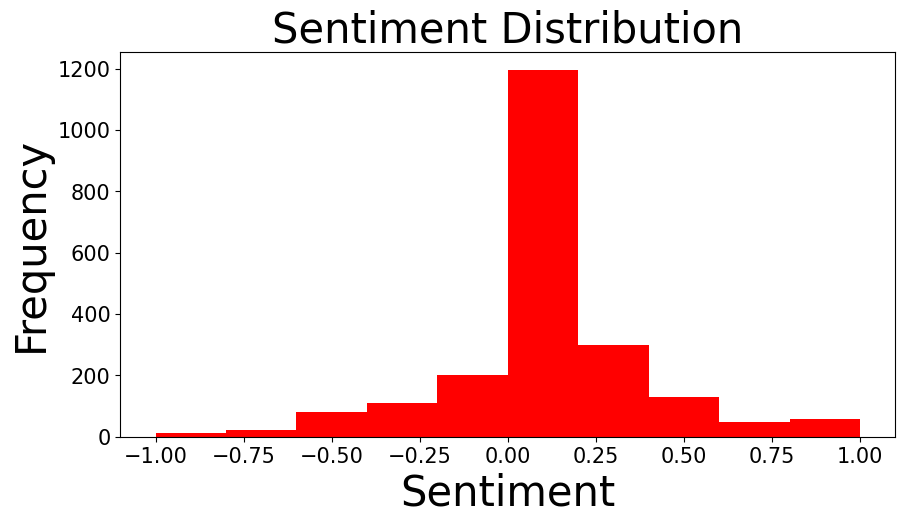

In [123]:
# Bar chart of the sentiment
plt.figure(figsize=(10,5)) #setting the dimensions of the figure
plt.xlabel('Sentiment', fontsize=30) #setting the title and font size of the x axis label
plt.xticks(fontsize=15) #setting the title and font size of the x xis ticks
plt.ylabel('Frequency', fontsize=30) #setting the title and font size of the y axis label
plt.yticks(fontsize=15) #setting the font size of the y xis ticks
plt.hist(cleaned_comments_data_df['polarity'], bins=10, color='red') #creating a histogram using plt.hist() function; arguing for the polarity column to comprise the plotted data, set 10 bins and red color
plt.title('Sentiment Distribution', fontsize=30) #setting histogram title and fontsize 
plt.show() #display plot

Bar Chart of Subjectivity Distribution 

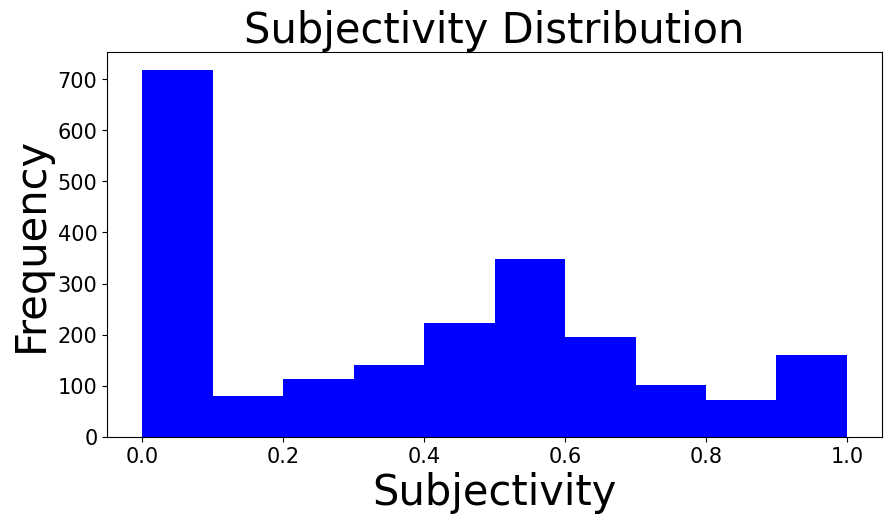

In [124]:
#Bar chart of the subjectivity
plt.figure(figsize=(10,5)) #setting the dimensions of the figure
plt.xlabel('Subjectivity', fontsize=30) #setting the title and font size of the x axis label
plt.xticks(fontsize=15) #setting the title and font size of the x xis ticks
plt.ylabel('Frequency', fontsize=30) #setting the title and font size of the y axis label
plt.yticks(fontsize=15) #setting the font size of the y xis ticks
plt.hist(cleaned_comments_data_df['subjectivity'], bins=10, color='blue') #creating a histogram using plt.hist() function; arguing for the subjectivity column to comprise the plotted data, set 10 bins and blue color
plt.title('Subjectivity Distribution', fontsize=30) #setting histogram title and fontsize 
plt.show() #display plot

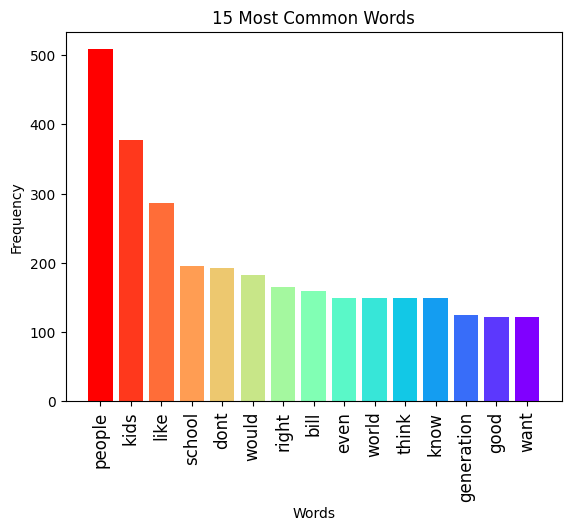

In [125]:
#bar chart of 15 most common words

count_word = collections.Counter(all_words.split()) #using collections module to create a Counter object (key-value pairs) from the all_words string using split() to split it into individual words
most_common = count_word.most_common(15) #using most_common method to create a list of the 15 most common words in the text

words = [pair[0] for pair in most_common] #extracting the words; pair[0] extracts the word 
counts = [pair[1] for pair in most_common] #extracting their frequencies to create a list of the 15 most common words in the text; pair[1] extracts the value

plt.bar(words, counts) #plotting the bar chart using bar() function; words list for x axis, counts list for y axis 
plt.title("15 Most Common Words") #title 
plt.xlabel("Words") #x axis label
plt.ylabel("Frequency") #y axis label 
plt.xticks(fontsize=12) #font size of x ticks
plt.xticks(rotation=90) #rotating x-axis tick labels to vertical orientation
rainbow_colors = plt.get_cmap('rainbow')(np.linspace(0, 1, len(counts)))[::-1] #creating an array of colors with rainbow gradient based on bar frequency, flipped
plt.bar(words, counts, color=rainbow_colors) #setting color parameter to rainbow_colors 
plt.show() #display plot 

5. Do at least 2 exploratory analyses of the data (bar plots, histogram, etc.)

Frequency of top 50 scoring comments 

In [126]:
#getting the sentiments of the top 50 scoring comments

sorted_data = cleaned_comments_data_df.sort_values('comment_score', ascending=False) #sorting the comments data by comment score in descending order using .sort_values() method
most_common_50 = sorted_data.head(50)

print(most_common_50[['comment_score', 'sentiment']]) #including the sentiment classification of each high scoring comment

      comment_score           sentiment
0              7957  Positive Sentiment
3              3041   Neutral Sentiment
1              2564  Positive Sentiment
10             1885  Positive Sentiment
8              1357  Negative Sentiment
5              1182  Positive Sentiment
2              1164  Positive Sentiment
895             943  Positive Sentiment
848             740  Positive Sentiment
897             698   Neutral Sentiment
6               629  Positive Sentiment
925             578   Neutral Sentiment
870             575  Negative Sentiment
1350            499  Positive Sentiment
11              472  Negative Sentiment
1393            447  Negative Sentiment
849             395   Neutral Sentiment
15              356   Neutral Sentiment
18              330   Neutral Sentiment
12              317  Positive Sentiment
917             317  Negative Sentiment
907             316  Positive Sentiment
7               281  Positive Sentiment
1364            266   Neutral Sentiment


In [127]:
#getting the frequency breakdown of sentiment 
sentiment_counts = most_common_50['sentiment'].value_counts() #displaying the sentiment counts using .value_counts() method

print('Polarity Frequency of Top 50 Words:')
print(sentiment_counts)

Polarity Frequency of Top 50 Words:
Positive Sentiment    24
Neutral Sentiment     15
Negative Sentiment    11
Name: sentiment, dtype: int64


In [128]:
#getting the percentage breakdown of sentiment 
sentiment_counts = most_common_50['sentiment'].value_counts(normalize=True) * 100 #normalizing the counts and multiplying by 100 to get the percentage

print('Polarity Frequency of Top 50 Words (%):')
print(sentiment_counts)

Polarity Frequency of Top 50 Words (%):
Positive Sentiment    48.0
Neutral Sentiment     30.0
Negative Sentiment    22.0
Name: sentiment, dtype: float64


In [129]:
#getting the subjectivity of the top 50 scoring comments

sorted_data = cleaned_comments_data_df.sort_values('comment_score', ascending=False) #sorting the comments data by comment score in descending order using .sort_values() method
most_common_50 = sorted_data.head(50)

print(most_common_50[['comment_score', 'subjectivity2']]) #including the subjectivity classification of each high scoring comment

      comment_score subjectivity2
0              7957     Objective
3              3041     Objective
1              2564    Subjective
10             1885    Subjective
8              1357    Subjective
5              1182    Subjective
2              1164    Subjective
895             943    Subjective
848             740    Subjective
897             698     Objective
6               629    Subjective
925             578     Objective
870             575     Objective
1350            499    Subjective
11              472    Subjective
1393            447    Subjective
849             395     Objective
15              356     Objective
18              330     Objective
12              317     Objective
917             317    Subjective
907             316     Objective
7               281    Subjective
1364            266     Objective
13              265     Objective
4               251    Subjective
852             231     Objective
916             212    Subjective
888           

In [130]:
#getting the frequency breakdown

subjectivity_counts = most_common_50['subjectivity2'].value_counts() #getting the subjectivity counts using .value_counts() method

print('Subjectivity Frequency of Top 50 Words:')
print(subjectivity_counts)

Subjectivity Frequency of Top 50 Words:
Subjective    26
Objective     24
Name: subjectivity2, dtype: int64


In [131]:
subjectivity_counts = most_common_50['subjectivity2'].value_counts(normalize=True) * 100 #normalizing the counts and multiplying by 100 to get the percentage

print('Subjectivity Frequency of Top 50 Words(%):')
print(subjectivity_counts)

Subjectivity Frequency of Top 50 Words(%):
Subjective    52.0
Objective     48.0
Name: subjectivity2, dtype: float64


Scatterplot of polarity vs. subjectivity 

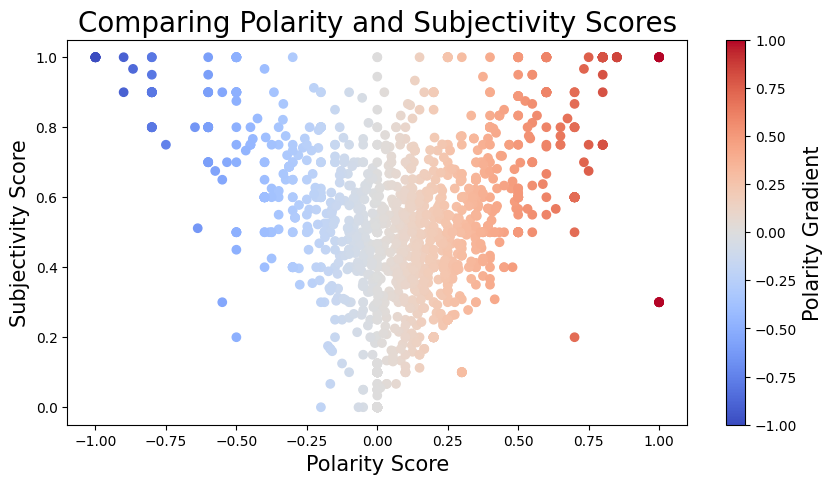

In [132]:
#scatter plot of sentiment polarity vs. subjectivity
plt.figure(figsize=(10, 5)) #setting dimensions of the figure
#creating a scatter plot using scatter() function; arguing for 'polarity' column as the x axis and 'subjectivity' column as the y axis 
#setting c parameter to the polarity column so the colors of the points correspond to their polarity score (cmap 'coolwarm')
plt.scatter(cleaned_comments_data_df['polarity'], cleaned_comments_data_df['subjectivity'], c=cleaned_comments_data_df['polarity'], cmap='coolwarm')

#set plot title, axis labels and font sizes
plt.title('Comparing Polarity and Subjectivity Scores', fontsize=20)
plt.xlabel('Polarity Score', fontsize=15)
plt.ylabel('Subjectivity Score', fontsize=15)

#adding a gradient colorbar for clarity using .colorbar() method
cbar = plt.colorbar()
cbar.ax.set_ylabel('Polarity Gradient', fontsize=15)

plt.show() #display plot

Scatter plot of comment score vs. subjectivity 

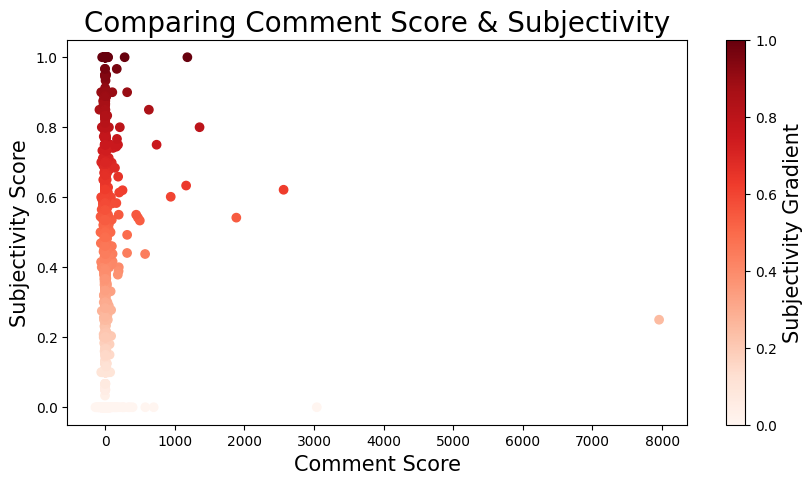

In [134]:
#comment score vs subjectivity 

plt.figure(figsize=(10, 5)) #specifying figure dimensions 
#creating a scatter plot using scatter() function; arguing for 'comment_score' column as the x axis and 'subjectivity' column as the y axis 
#setting c parameter to the subjectivity column so the colors of the points correspond to their subjectivity score (cmap 'coolwarm')
plt.scatter(cleaned_comments_data_df['comment_score'], cleaned_comments_data_df['subjectivity'], c=cleaned_comments_data_df['subjectivity'], cmap='Reds')

#set plot title, axis labels and font sizes 
plt.title('Comparing Comment Score & Subjectivity', fontsize=20)
plt.xlabel('Comment Score', fontsize=15)
plt.ylabel('Subjectivity Score', fontsize=15)

#adding a gradient colorbar for clarity using .colorbar() method
cbar = plt.colorbar()
cbar.ax.set_ylabel('Subjectivity Gradient', fontsize=15)

#show plot
plt.show()

Scatterplot of comment score vs. polarity 

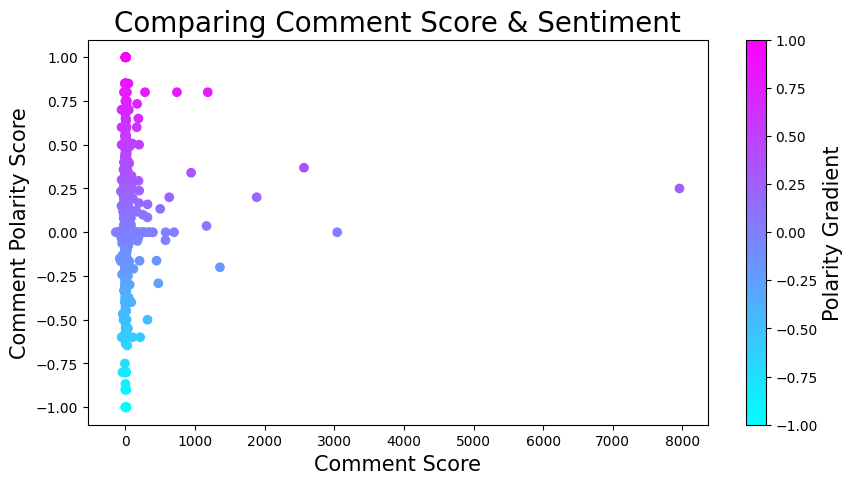

In [135]:
#comment score vs polarity 

plt.figure(figsize=(10, 5)) #specifying figure dimensions 
#creating a scatter plot using scatter() function; arguing for 'comment_score' column as the x axis and 'polarity' column as the y axis 
#setting c parameter to the polarity column so the colors of the points correspond to their polarity score (cmap 'coolwarm')
plt.scatter(cleaned_comments_data_df['comment_score'], cleaned_comments_data_df['polarity'], c=cleaned_comments_data_df['polarity'], cmap='cool')

#set plot title, axis labels and font sizes
plt.title('Comparing Comment Score & Sentiment', fontsize=20)
plt.xlabel('Comment Score', fontsize=15)
plt.ylabel('Comment Polarity Score', fontsize=15)

#adding a gradient colorbar for clarity using .colorbar() method
cbar = plt.colorbar()
cbar.ax.set_ylabel('Polarity Gradient', fontsize=15)

#show plot
plt.show()